In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# needed for jupyter notebooks
plt.rcParams['figure.figsize']=(20,10) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme
url = "C:\\Users\\ivonnics\\Documents\\JOSE LUIS\\Cursos Cursera\\Machine Learning\\sales.csv"
sales = pd.read_csv(url)
sales.shape

(72, 3)

In [2]:
list(sales)

['Date', 'Sales_Dollars', 'Quantity']

In [3]:
sales.head()

,Date,Sales_Dollars,Quantity
0,2009-10-01,338630,2160
1,2009-11-01,339386,785
2,2009-12-01,400264,2118
3,2010-01-01,314640,2544
4,2010-02-01,311022,1288


In [7]:
sales.isnull().sum()

Date             0
Sales_Dollars    0
Quantity         0
dtype: int64

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
Date             72 non-null object
Sales_Dollars    72 non-null int64
Quantity         72 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.8+ KB


In [11]:
sales['Sales_Dollars'].corr(sales['Quantity'])

-0.18905274250248955

In [12]:
sales['Quantity'].corr(sales['Sales_Dollars'])

-0.18905274250248957

[Text(0, 0, 'FY 2010'),
 Text(0, 0, 'FY 2011'),
 Text(0, 0, 'FY 2012'),
 Text(0, 0, 'FY 2013'),
 Text(0, 0, 'FY 2014'),
 Text(0, 0, 'FY 2015')]

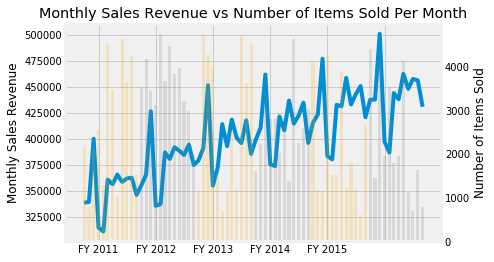

In [9]:
sales.Date = pd.to_datetime(sales.Date) #set the date column to datetime
sales.set_index('Date', inplace=True) #set the index to the date column
# now the hack for the multi-colored bar chart: 
# create fiscal year dataframes covering the timeframes you are looking for. In this case,
# the fiscal year covered October - September.
# --------------------------------------------------------------------------------
# Note: This should be set up as a function, but for this small amount of data,
# I just manually built each fiscal year. This is not very pythonic and would
# suck to do if you have many years of data, but it isn't bad for a few years of data. 
# --------------------------------------------------------------------------------
fy10_all = sales[(sales.index >= '2009-10-01') & (sales.index < '2010-10-01')]
fy11_all = sales[(sales.index >= '2010-10-01') & (sales.index < '2011-10-01')]
fy12_all = sales[(sales.index >= '2011-10-01') & (sales.index < '2012-10-01')]
fy13_all = sales[(sales.index >= '2012-10-01') & (sales.index < '2013-10-01')]
fy14_all = sales[(sales.index >= '2013-10-01') & (sales.index < '2014-10-01')]
fy15_all = sales[(sales.index >= '2014-10-01') & (sales.index < '2015-10-01')]
# Let's build our plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # set up the 2nd axis
ax1.plot(sales.Sales_Dollars) #plot the Revenue on axis #1
# the next few lines plot the fiscal year data as bar plots and changes the color for each.
ax2.bar(fy10_all.index, fy10_all.Quantity,width=20, alpha=0.2, color='orange')
ax2.bar(fy11_all.index, fy11_all.Quantity,width=20, alpha=0.2, color='gray')
ax2.bar(fy12_all.index, fy12_all.Quantity,width=20, alpha=0.2, color='orange')
ax2.bar(fy13_all.index, fy13_all.Quantity,width=20, alpha=0.2, color='gray')
ax2.bar(fy14_all.index, fy14_all.Quantity,width=20, alpha=0.2, color='orange')
ax2.bar(fy15_all.index, fy15_all.Quantity,width=20, alpha=0.2, color='gray')
ax2.grid(b=False) # turn off grid #2
ax1.set_title('Monthly Sales Revenue vs Number of Items Sold Per Month')
ax1.set_ylabel('Monthly Sales Revenue')
ax2.set_ylabel('Number of Items Sold')
# Set the x-axis labels to be more meaningful than just some random dates.
labels = ['FY 2010', 'FY 2011','FY 2012', 'FY 2013','FY 2014', 'FY 2015']
ax1.axes.set_xticklabels(labels)

In [10]:
"""

from: https://towardsdatascience.com/customizing-plots-with-python-matplotlib-bcf02691931f

import matplotlib.cm as cm
#loading dataset
#df = pd.read_csv(‘workout_log.csv’)
#df.columns = [‘date’, ‘distance_km’, ‘duration_min’, ‘delta_last_workout’, ‘day_category’]
def scatterplot(df, x_dim, y_dim, category):
   x = df[x_dim]
   y = df[y_dim]
   #converting original (numerical) labels into categorical labels
   categories = df[category].apply(lambda x: 'weekday' if x == 0 else 'weekend')
   fig, ax = plt.subplots(figsize=(10, 5))
   #assigns a color to each data point
   colors = ['#2300A8', '#00A658']
   #iterates through the dataset plotting each data point and assigning it its corresponding color and label
   for i in range(len(df)):
     ax.scatter(x.ix[i], y.ix[i], alpha=0.70, color = colors[i%len(colors)], label=categories.ix[i])
   #adds title and axes labels
   ax.set_title('Distance vs Workout Duration')
   ax.set_xlabel('Distance (Km)')
   ax.set_ylabel('Workout Duration (min)')
   #removing top and right borders
   ax.spines['top'].set_visible(False)
   ax.spines['right'].set_visible(False)
   #adds major gridlines
   ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
   #adds legend
   ax.legend(categories.unique())
   plt.show()
scatterplot(df, 'distance_km', 'duration_min', 'day_category')
"""

"\n\nfrom: https://towardsdatascience.com/customizing-plots-with-python-matplotlib-bcf02691931f\n\nimport matplotlib.cm as cm\n#loading dataset\n#df = pd.read_csv(‘workout_log.csv’)\n#df.columns = [‘date’, ‘distance_km’, ‘duration_min’, ‘delta_last_workout’, ‘day_category’]\ndef scatterplot(df, x_dim, y_dim, category):\n   x = df[x_dim]\n   y = df[y_dim]\n   #converting original (numerical) labels into categorical labels\n   categories = df[category].apply(lambda x: 'weekday' if x == 0 else 'weekend')\n   fig, ax = plt.subplots(figsize=(10, 5))\n   #assigns a color to each data point\n   colors = ['#2300A8', '#00A658']\n   #iterates through the dataset plotting each data point and assigning it its corresponding color and label\n   for i in range(len(df)):\n     ax.scatter(x.ix[i], y.ix[i], alpha=0.70, color = colors[i%len(colors)], label=categories.ix[i])\n   #adds title and axes labels\n   ax.set_title('Distance vs Workout Duration')\n   ax.set_xlabel('Distance (Km)')\n   ax.set_ylabe